In [1]:
import numpy as np 
import pandas as pd 
import os 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [109]:
c = 0
Y = []
X = []
all_data = []
y_coords = []
z_coords = []


In [110]:
dataset_path = os.path.join(os.getcwd(), 'uWaveGestureLibrary')

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    for file in os.listdir(folder_path):
        if file[0].isalpha() and file.endswith('.txt'):
            gesture_index = int(file.split("-")[0][-1])
            data = []
            with open(os.path.join(folder_path,file), 'r') as file:
                for line in file:
            # Split the line by spaces and convert each element to float
                    row = [float(x) for x in line.strip().split()]
                    data.extend(row)
                all_data.append(data)
            Y.append(gesture_index)
            
            

In [111]:

max_length = max(len(seq) for seq in all_data)

# Pad sequences with zeros
X = np.array([seq + [0] * (max_length - len(seq)) for seq in all_data])


In [112]:
X.shape

(4480, 945)

In [114]:

Y = np.array(Y)

In [115]:
Y.shape

(4480,)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [117]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [363]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       117
           2       0.99      0.99      0.99       128
           3       0.97      0.99      0.98       103
           4       0.99      1.00      1.00       124
           5       0.95      0.99      0.97       105
           6       0.99      0.95      0.97       108
           7       0.99      0.97      0.98       119
           8       1.00      0.99      0.99        92

    accuracy                           0.98       896
   macro avg       0.98      0.98      0.98       896
weighted avg       0.98      0.98      0.98       896

Confusion Matrix:
[[115   1   1   0   0   0   0   0]
 [  0 127   0   0   0   0   1   0]
 [  0   0 102   0   0   1   0   0]
 [  0   0   0 124   0   0   0   0]
 [  0   0   0   1 104   0   0   0]
 [  0   0   0   0   5 103   0   0]
 [  1   0   2   0   0   0 116   0]
 [  1   0   0   0   0   0   0  91]]


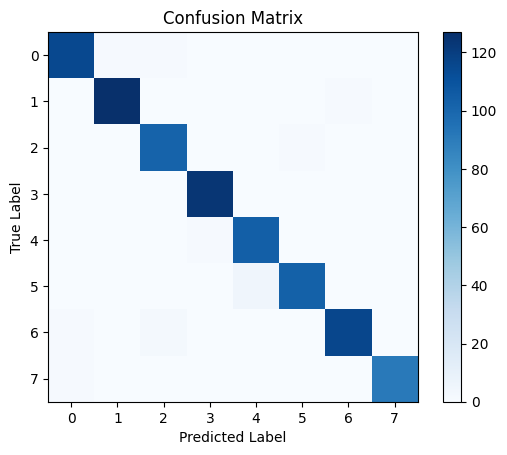

In [367]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(cm))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence


In [ ]:

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1],1)))
model.add(Dense(9, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32, verbose=1)

In [19]:
X_train.shape

(3584, 945)

In [55]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [64]:
classifiers = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    GaussianNB(),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    ExtraTreeClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_neighbors=5),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),
    SVC(kernel='rbf', gamma='scale')

    ]

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
metrics = {'Accuracy': accuracy_score,
            'Precision': precision_score,
            'Recall': recall_score,
            'F1-score': f1_score}


In [71]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    y_pred = clf.predict(X_test)
    print("="*30)
    print(name)
    print(classification_report(y_test, y_pred))
    



        


RandomForestClassifier
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       117
           2       0.99      0.99      0.99       128
           3       0.97      0.99      0.98       103
           4       0.99      1.00      1.00       124
           5       0.95      0.99      0.97       105
           6       0.99      0.95      0.97       108
           7       0.99      0.97      0.98       119
           8       1.00      0.99      0.99        92

    accuracy                           0.98       896
   macro avg       0.98      0.98      0.98       896
weighted avg       0.98      0.98      0.98       896

GaussianNB
              precision    recall  f1-score   support

           1       1.00      0.08      0.14       117
           2       1.00      0.32      0.49       128
           3       0.28      0.97      0.44       103
           4       0.14      0.01      0.02       124
           5       0.59      0.98      0.74 

In [100]:
import os 
import numpy as np
import pandas as pd

dataset_path = os.path.join(os.getcwd(), 'uWaveGestureLibrary')
Y = []
X = []
all_data = []
y_coords = []
z_coords = []

def load_data(dataset_path):
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        for file in os.listdir(folder_path):
            if file[0].isalpha() and file.endswith('.txt'):
                gesture_index = int(file.split("-")[0][-1])
                data = []
                with open(os.path.join(folder_path,file), 'r') as file:
                    for line in file:
                # Split the line by spaces and convert each element to float
                        row = [float(x) for x in line.strip().split()]
                        data.extend(row)
                    all_data.append(data)
                Y.append(gesture_index)
    return all_data, Y



def prepare_data(features, Y):
    features, Y = load_data(dataset_path)
    max_length = max(len(seq) for seq in all_data)
    # Pad sequences with zeros
    X = np.array([seq + [0] * (max_length - len(seq)) for seq in all_data])
    Y = np.array(Y)
    return X, Y

In [91]:
features, Y = load_data(dataset_path)
X , y = prepare_data(features, Y)

In [93]:
y.shape

(8960,)

In [163]:
input = []
with open('data8.txt', 'r') as file:
        for line in file:
        # Split the line by spaces and convert each element to float
            row = [float(x) for x in line.strip().split()]
            input.extend(row)


In [164]:

input = np.array(input + [0] * (max_length - len(input)))

In [165]:
model.predict(input.reshape(1, -1))[0]

8

In [134]:
with open("data.txt", "r") as file:
    data = np.loadtxt(file)

# Reshape the data into 1 row and 15 columns
reshaped_data = data.flatten()

In [ ]:
import pandas as pd

# Read the data from the text file into a DataFrame
df = pd.read_csv("data.txt", header=None, delimiter="\s+")

# Convert DataFrame to a single row with 15 columns
reshaped_df = df.values.flatten()

print("Original DataFrame:")
print(df)
print("\nReshaped DataFrame:")
print(reshaped_df)

In [156]:
dataset_path = os.path.join(os.getcwd(), 'uWaveGestureLibrary')
all_data1 = []
Y = []
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    for file in os.listdir(folder_path):
        if file[0].isalpha() and file.endswith('.txt'):
            gesture_index = int(file.split("-")[0][-1])
            df = pd.read_csv(os.path.join(folder_path,file), header=None, delimiter="\s+")
            reshaped_df = df.values.flatten()
            all_data1.append(reshaped_df)
            Y.append(gesture_index)

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\aayam\AppData\Local\Temp\ipykernel_53684\4079868058.py:9: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(os.path.join(folder_path,file), header=None, delimiter="\s+")


In [158]:
X = np.array(all_data1)
y = np.array(Y)

In [159]:
max_length = max(len(seq) for seq in all_data1)


In [157]:
for i in range(len(all_data1)):
    array_length = len(all_data1[i])
    padding_length = max_length - array_length
    padding = np.zeros(padding_length)
    all_data1[i] = np.concatenate((all_data1[i], padding))


In [149]:
X = np.array(all_data1)

In [160]:
y.shape

(4480,)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [174]:

df1 = pd.read_csv('data8.txt', header=None, delimiter="\s+")
reshaped_df1 = df.values.flatten()
input = np.array(reshaped_df1)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\aayam\AppData\Local\Temp\ipykernel_53684\2817251104.py:1: SyntaxWarning: invalid escape sequence '\s'
  df1 = pd.read_csv('data8.txt', header=None, delimiter="\s+")


In [175]:

padding = np.zeros(max_length - len(input))
input = np.concatenate((input, padding))


In [176]:
input.shape

(945,)

In [173]:
model.predict(input.reshape(1, -1))[0]

8

In [177]:
MODEL_DIR = 'clf_models'

In [179]:
model_dir = os.path.join(MODEL_DIR, 'clf_model.joblib')

In [180]:
model_dir

'clf_models\\clf_model.joblib'